In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

X,y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

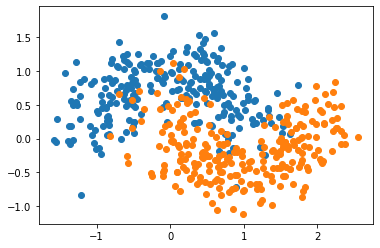

In [4]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=666)

In [6]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X_train,y_train)
log_clf.score(X_test,y_test)

0.872

In [7]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train,y_train)
svm_clf.score(X_test,y_test)

0.888

In [9]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
dt_clf.score(X_test,y_test)

0.872

In [10]:
y_predict1 = log_clf.predict(X_test)
y_predict2 = svm_clf.predict(X_test)
y_predict3 = dt_clf.predict(X_test)

In [11]:
y_predict = np.array((y_predict1 + y_predict2 + y_predict3)>=2, dtype='int')

In [13]:
y_predict[:10]

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1])

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.88

### 使用Voting Classifierm

In [19]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('log_clf',LogisticRegression()),
    ('svm',SVC()),
    ('dt_clf',DecisionTreeClassifier())
], voting='hard')

In [21]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('log_clf', LogisticRegression()), ('svm', SVC()),
                             ('dt_clf', DecisionTreeClassifier())])

In [22]:
voting_clf.score(X_test,y_test)

0.88